### Tree Structures
Classification Trees: category-based
Regression Trees: numerical in nature
CART (decision trees): Classification And Regression Trees

EX: "I before E except after C" Truth analysis

~500 words in the net_talk database with ie or ei
143 ei words
357 ie words

First draw a node to break into:
ie or ei comes after 'c', and those that don't

Gini Index:: Creating weight for decision tree result
x = fraction of positive labels
1/2 = maximum impure value
resulting value is: 0 to 0.5
Gini(x) = 1/2 - 2(x-1/2)<sup>2</sup>

ie:

In [1]:
# Pull word list
# instead of going from word spelling to pronunciation
# we're going from pronunciation to spelling

from dask.dot import graphviz
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv -NO diabetes.csv

for details.

--2021-01-15 13:30:30--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.40.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.40.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.005s  

2021-01-15 13:30:31 (4.81 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [65]:
# Factors determining whether somebody has developed diabetes in the past 5 years

with open("diabetes.csv","r") as f:
    data = f.readlines()

feats = data.pop(0)
feats = feats.split(",")
# feats = feats[0:outcome_index] # old sucky code - gunked shit up
if 'Outcome\n' in feats:
    # feats.pop()
    feats.remove('Outcome\n')

In [66]:
dat = []
labs = []

for i in data:
    # line = data[i]
    # line = line.replace('\n',' ') # don't need this either; it automatically clips the newline char
    csvline = i.split(",")
    labs = labs + [int(csvline.pop())] # instead of the bunkery below, we pop and return the label as and int
    # labs = labs + [int(csvline[len(csvline)-1])]
    csvline = list(map(float, csvline))
    # csvline = [float(csvline[i]) for i in range(len(csvline)-1)]
    dat.append(csvline)
    # dat = dat + [csvline]

In [69]:
print(len(dat))

768


In [70]:
print(dat[15])

[7.0, 100.0, 0.0, 0.0, 0.0, 30.0, 0.484, 32.0]


In [74]:
from sklearn import tree

# alldat = dat
# alllabs = labs

clf = tree.DecisionTreeClassifier(max_leaf_nodes=5)
clf = clf.fit(dat,labs)

In [75]:
correct = 0
lendat = len(dat)
for i in range(lendat):
    if clf.predict([dat[i]]) == labs[i]: correct = correct+1
100.0*correct/lendat

77.21354166666667

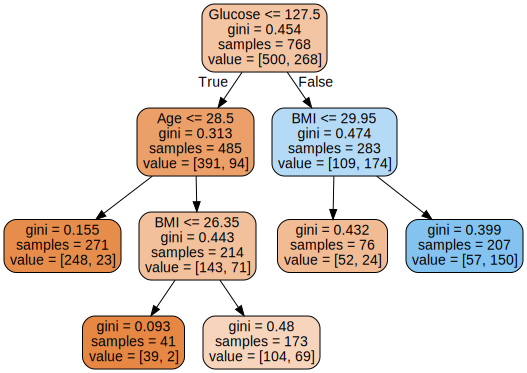

In [76]:
import graphviz
dot_data = tree.export_graphviz(clf, feature_names=feats, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph



Ex Null
Ex Nil
Ex Not
Ex Nihil
Ex Naught